In [13]:
""" Bibliotecas para todo el trabajo. """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

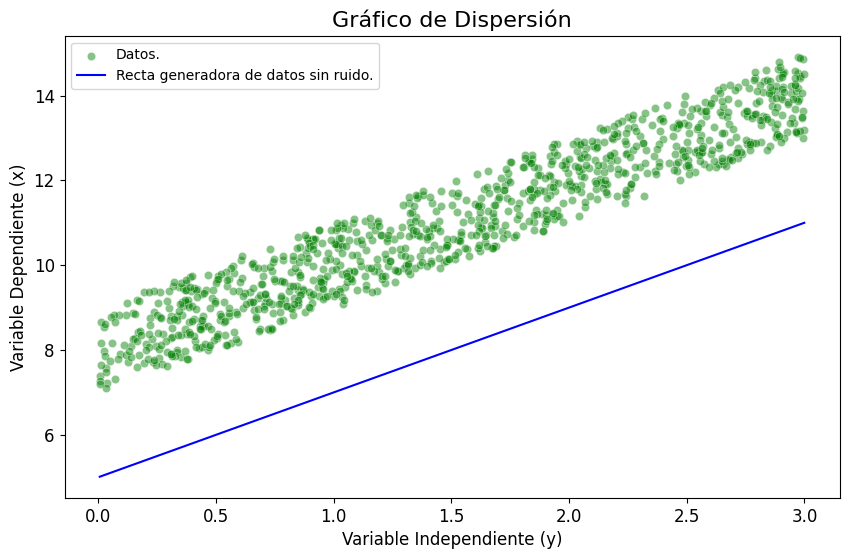

In [14]:
""" 2.1 REGRESIÓN LINEAL: solución cerrada."""

# 2.1.2 Generación de 1.000 valores de x ~ U(0,3).

x = np.random.uniform(0,3,1000)

# 2.1.3 Generación de 1.000 valores de y a partir de x, con error ~ U(2,4).

y = 5 + 2*x + np.random.uniform(2,4,1000)

# 2.1.4 Gráfico de dispersión con ajustes (agrego recta generadora de datos para fines didácticos).

plt.figure(figsize=(10,6))
sns.scatterplot(x=x,y=y, color="green", alpha=0.47, label="Datos.")
sns.lineplot(x=x, y=5 + 2*x, color="blue", label="Recta generadora de datos sin ruido.")
plt.title("Gráfico de Dispersión",fontsize="16")
plt.xlabel("Variable Independiente (y)",fontsize="12")
plt.ylabel("Variable Dependiente (x)",fontsize="12")
plt.xticks(fontsize="12")
plt.yticks(fontsize="12")
plt.show()

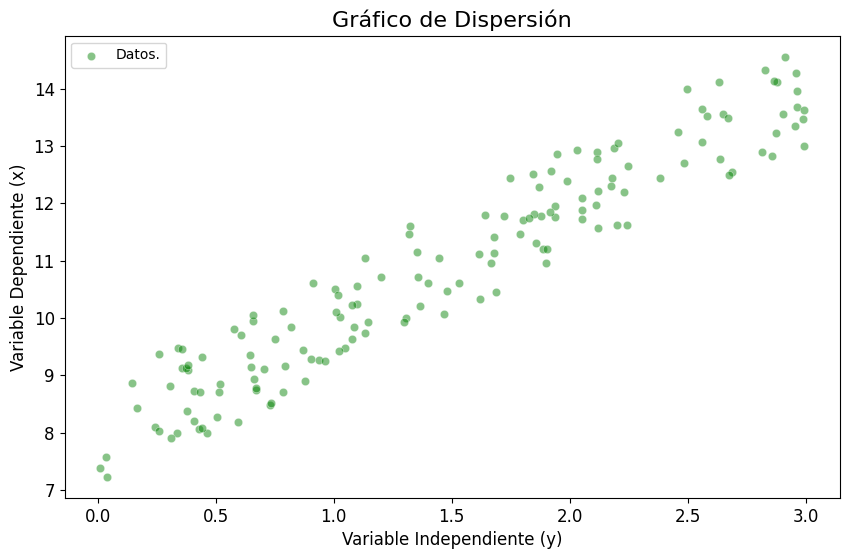

In [15]:
#2.1.5 Función para graficar datos (agrego recta generadora de datos para fines didácticos).

def grafico_datos(x, y, cantidad=1000):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x[:cantidad], y=y[:cantidad], color="green", alpha=0.47, label="Datos.")
    # sns.lineplot(x=x, y=5 + 2*x, color="blue", label="Recta generadora de datos sin ruido.")
    plt.title("Gráfico de Dispersión",fontsize="16")
    plt.xlabel("Variable Independiente (y)",fontsize="12")
    plt.ylabel("Variable Dependiente (x)",fontsize="12")
    plt.xticks(fontsize="12")
    plt.yticks(fontsize="12")
    
    decisionUsuario = input(f"Presione 'G' para guardar el gráfico, 'V' para verlo y cualquier otro botón para continuar...").lower().strip()
    if decisionUsuario == "g":
        plt.savefig(f"gráfico.png")
        print(f"Archivo guardado.")
    elif decisionUsuario == "v":
        plt.show()
    else:
        return

# Visualización función grafico_datos con menos de 1.000 datos (no requerido, sólo como prueba).
grafico_datos(x,y,150)

In [16]:
#2.1.6 Función para encontrar los parámetros W del regresor lineal.

def parametros(x, y):
    # Agregamos un vector de unos a x. Transponemos para obtener X de dimensiones 1000x2.
    X = np.vstack((np.ones(len(x)), x)).T
    # Solución cerrada: W = (X^T X)^(-1) X^T y.
    # Donde y de  es la matriz de datos conocidos y X es la matriz de características con el sesgo.
    W = np.linalg.inv(X.T @ X) @ X.T @ y
    return W

# Obtención de los parámetros W (no requerido, sólo como prueba).
W = parametros(x,y)
print(f"Los parámetros optimizados son: {W}")

Los parámetros optimizados son: [7.95137203 2.01446257]


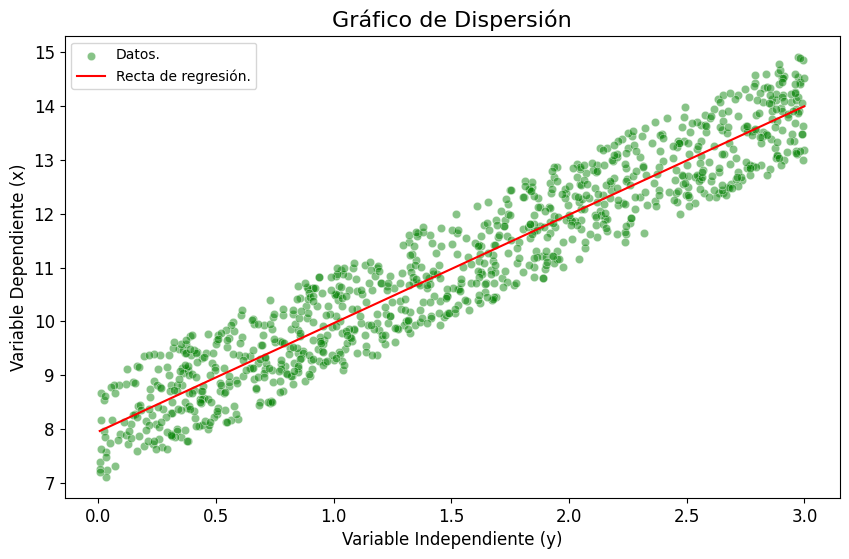

In [17]:
#2.1.7 Función que grafica los datos y la recta de regresión (agrego recta generadora de datos para fines didácticos).

def grafico_regresion(x, y, W):
    plt.figure(figsize=(10, 6))
    # Gráfico de dispersión de los datos
    sns.scatterplot(x=x, y=y, color="green", alpha=0.47, label="Datos.")

    # Generación de la recta de regresión
    valores_x = np.linspace(min(x), max(x), 1000)
    valores_y = W[0] + W[1] * valores_x
    sns.lineplot(x=valores_x, y=valores_y, color="red", label="Recta de regresión.")
    # sns.lineplot(x=valores_x, y=5 + 2*valores_x, color="blue", label="Recta generadora de datos sin ruido.")

    plt.title("Gráfico de Dispersión",fontsize="16")
    plt.xlabel("Variable Independiente (y)",fontsize="12")
    plt.ylabel("Variable Dependiente (x)",fontsize="12")
    plt.xticks(fontsize="12")
    plt.yticks(fontsize="12")
    plt.show()

# Visualización de la función grafico_regresion.
grafico_regresion(x,y,W)

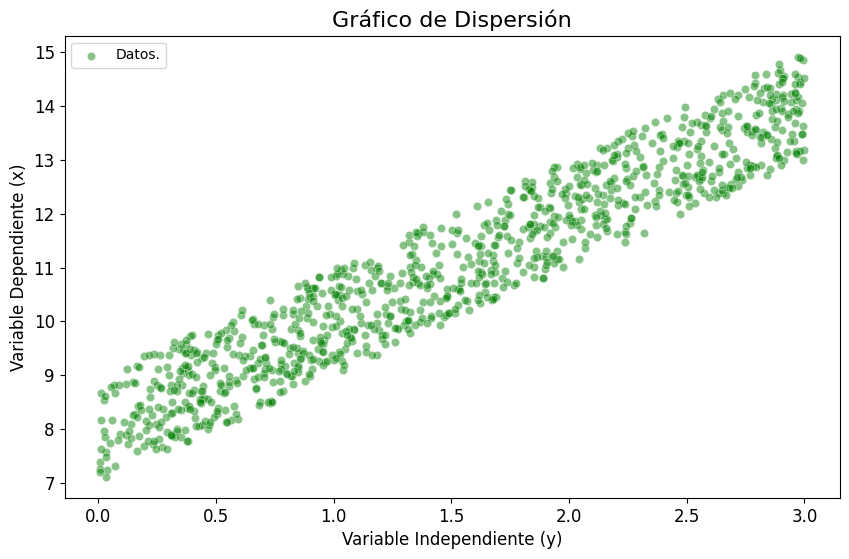

Los parámetros optimizados son: [7.95137203 2.01446257]


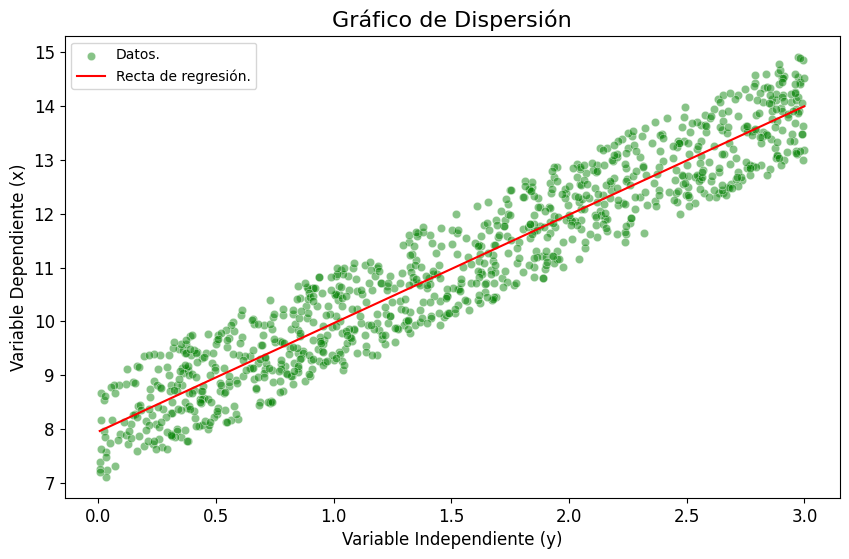

In [18]:
#2.1.8 Creación de la clase regressionLineal.

class regressionLineal:
    def __init__(self, tipo_datos="simulado", cantidad=1000):
        self.tipo_datos = tipo_datos
        self.cantidad = cantidad
        self.W = None

    def graficar_datos(self, x, y):
        grafico_datos(x, y, self.cantidad)

    def calcular_parametros(self, x, y):
        self.W = parametros(x, y)
        return self.W

    def graficar_regresion(self, x, y):
        if self.W is None:
            raise ValueError("No es posible graficar porque no ha calculado los parámetros W")
        grafico_regresion(x, y, self.W)

#Instanciar la clase.

regresor_l = regressionLineal("simulado",1000)
regresor_l.graficar_datos(x,y)
W = regresor_l.calcular_parametros(x,y)
print(f"Los parámetros optimizados son: {W}")
regresor_l.graficar_regresion(x,y)

In [19]:
""" 2.2 REGRESIÓN POLINOMIAL"""

#2.2.1 Cargar Base de Datos.
data = pd.read_csv("measurements.csv", encoding="UTF-8")
data.head(100)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"11,8","5,3",52,NaN,11,NaN,SP98,0,0,0,NaN,NaN
96,"12,5","4,2",57,20,11,NaN,SP98,0,0,0,NaN,NaN
97,"15,7","5,3",33,NaN,9,NaN,SP98,0,0,0,NaN,NaN
98,"12,9","5,7",35,NaN,9,NaN,SP98,0,0,0,NaN,NaN


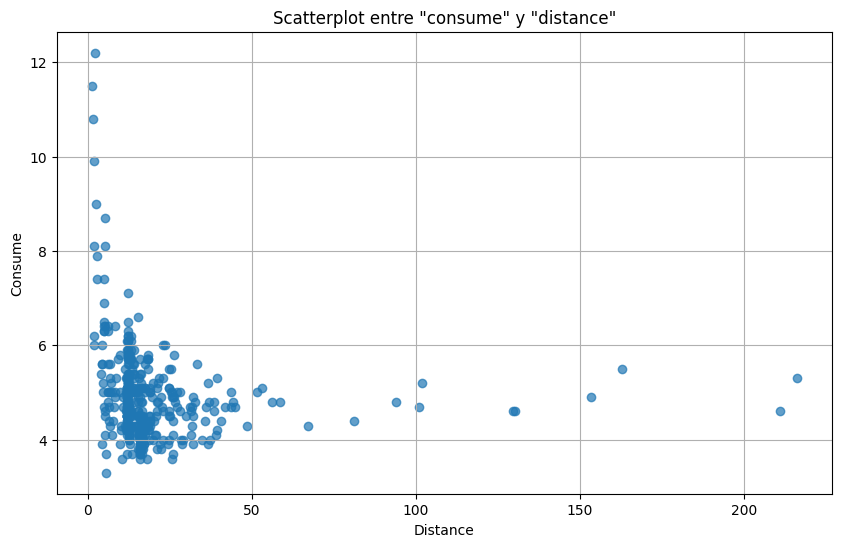

In [20]:
#2.2.2 Gráfico de Dispersión de "distance" (independiente) vs "consume" (dependiente).

data['consume'] = pd.to_numeric(data['consume'].astype(str).str.replace(',', '.', regex=False).str.strip(), errors='coerce')
data['distance'] = pd.to_numeric(data['distance'].astype(str).str.replace(',', '.', regex=False).str.strip(), errors='coerce')
y_consumo = data['consume']
x_distancia = data['distance']

plt.figure(figsize=(10, 6))
plt.scatter(x_distancia, y_consumo, alpha=0.7)
plt.title('Scatterplot entre "consume" y "distance"')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.grid(True)
plt.show()

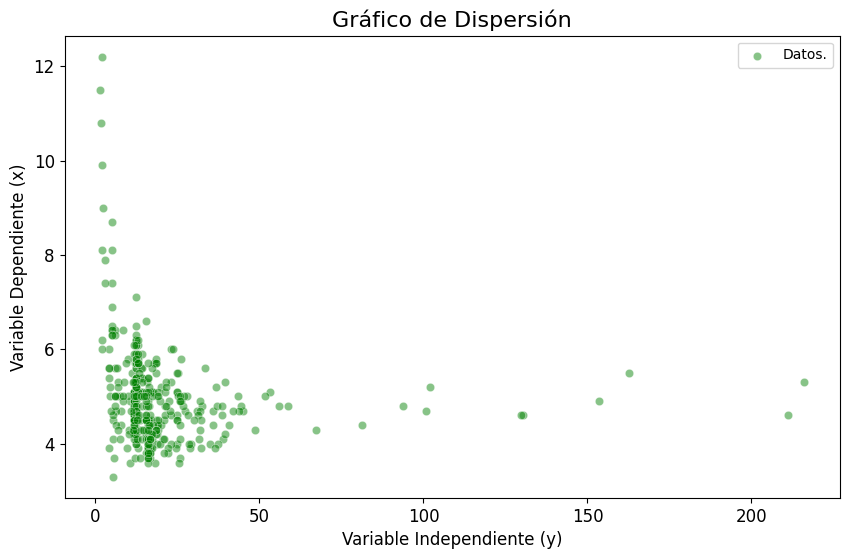

Los parámetros optimizados son: [ 5.02789331 -0.00587814]


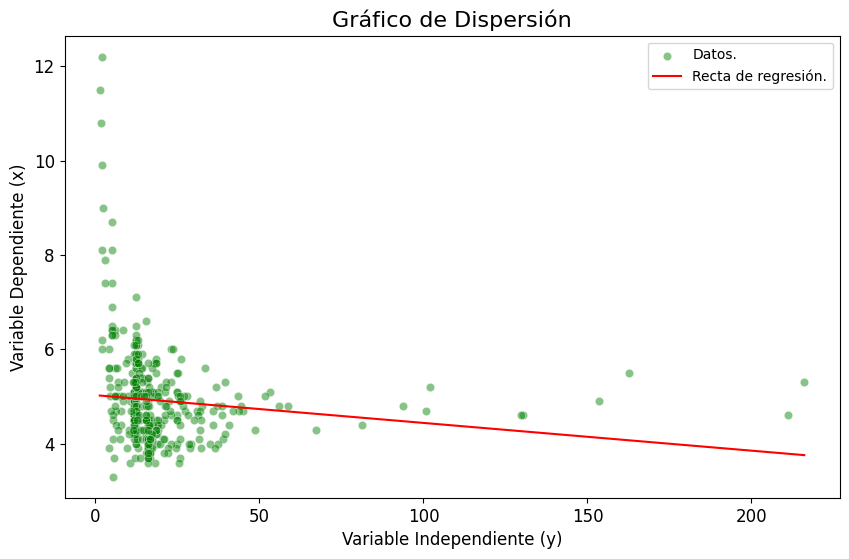

In [ ]:
#2.2.3 Primera aproximación con una regresión lineal.

regresor_l_aprox = regressionLineal("real",len(x_distancia))
regresor_l_aprox.graficar_datos(x_distancia,y_consumo)
W = regresor_l_aprox.calcular_parametros(x_distancia,y_consumo)
print(f"Los parámetros optimizados son: {W}")
regresor_l_aprox.graficar_regresion(x_distancia,y_consumo)

In [90]:
#2.2.4: Generar transformación polinomial de la variable independiente

# Configura transformación polinomial de grado 3 (arbitrario) para 'x_distancia' y ajusta la dimensión con "reshape".
polinomial = PolynomialFeatures(degree=3)
X_polinomial = polinomial.fit_transform(x_distancia.values.reshape(-1, 1))  

# La solución de la regresión lineal (W = (X^T X)^(-1) X^T y) aplica, porque cada término del polinomio actúa como una variable independiente. 
W_p = np.linalg.inv(X_polinomial.T @ X_polinomial) @ X_polinomial.T @ y_consumo

print(f"Los parámetros optimizados son: {W_p}")

Los parámetros optimizados son: [ 5.97258177e+00 -8.55167861e-02  1.04901940e-03 -3.18599679e-06]


Errores por grado: {1: np.float64(1.0469839006274746), 2: np.float64(0.9698919975271931), 3: np.float64(0.8903546968912681), 4: np.float64(0.8118964893560681), 5: np.float64(0.7377612907002664)}


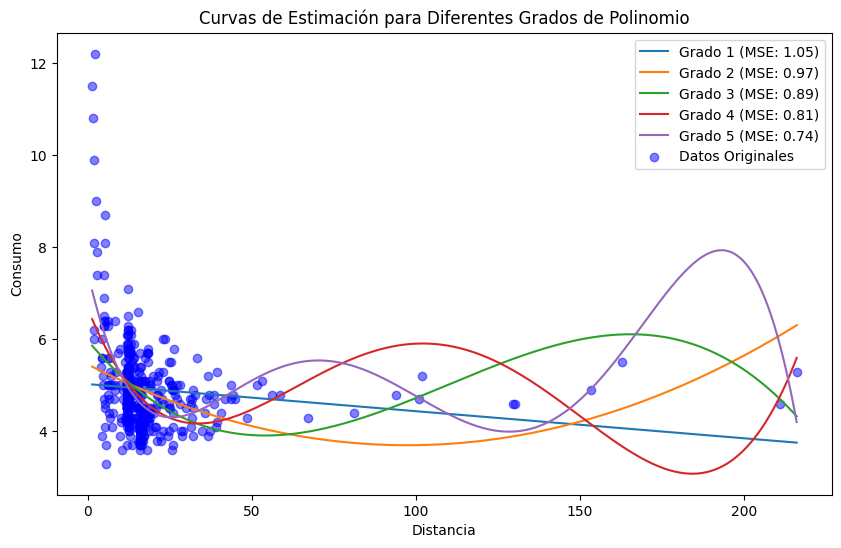

In [103]:
# 2.2.5 Ajuste de regresiones polinomiales de diferentes grados
prueba_grados = [1, 2, 3, 4, 5]

predicciones = {}
errores = {}
curvas_prediccion = {}  # Diccionario para almacenar las curvas de predicción

# Genera un conjunto de puntos x_variable para una curva suave en el rango de x_distancia
x_variable = np.linspace(x_distancia.min(), x_distancia.max(), 500).reshape(-1, 1)

# Ajusta la regresión polinomial para cada grado
for grado in prueba_grados:
    # Genera la transformación polinomial para el grado actual
    polinomial = PolynomialFeatures(degree=grado, include_bias=True)
    X_polinomial = polinomial.fit_transform(x_distancia.values.reshape(-1, 1))
    
    # Calcula los parámetros W para el ajuste de mínimos cuadrados
    W_p = np.linalg.inv(X_polinomial.T @ X_polinomial) @ X_polinomial.T @ y_consumo
    
    # Genera las predicciones y calcula el error cuadrático medio
    y_predicho = X_polinomial @ W_p
    mse = mean_squared_error(y_consumo, y_predicho)
    
    # Almacena el MSE y la predicción para cada grado
    predicciones[grado] = y_predicho
    errores[grado] = mse
    
    # Genera la matriz polinomial para x_variable y calcula la curva de predicción
    X_variable_polinomial = polinomial.fit_transform(x_variable)
    y_variable_predicho = X_variable_polinomial @ W_p
    
    # Almacena la curva de predicción para este grado
    curvas_prediccion[grado] = {
        'x': x_variable.flatten(),
        'y': y_variable_predicho.flatten(),
        'W_p': W_p
    }

# Imprime los errores cuadráticos medios para cada grado
print("Errores por grado:", errores)

# 2.2.6 Graficado de las curvas de estimación y los datos originales
plt.figure(figsize=(10, 6))

# Grafica las curvas de estimación para cada grado
for grado, curva in curvas_prediccion.items():
    plt.plot(curva['x'], curva['y'], label=f'Grado {grado} (MSE: {errores[grado]:.2f})')

# Grafica los puntos de datos originales
plt.scatter(x_distancia, y_consumo, color='blue', label='Datos Originales', alpha=0.5)

# Configura etiquetas y título
plt.xlabel('Distancia')
plt.ylabel('Consumo')
plt.title('Curvas de Estimación para Diferentes Grados de Polinomio')
plt.legend()
plt.show()

**¿Qué se observa en el error cuadrático medio y en la forma de las predicciones a medida que aumenta el grado del polinomio?** 
Se observa que a medida que aumenta el grado del polinomio, disminuye el error cuadrático medio. Además, se aprecia que la regresión polinomial, al menos hasta el grado 5, no es capaz de predecir correctamente valores atípicos. Asimismo, a medida que aumenta el grado del polinomio, parece sobreajustarse, dado que la curva coincide muy cercanamente con los valores extremos derechos. Pareciera ser además que la recta es un modelo demasiado simple para explicar la data, la cual a simple vista parece hiperbólica, corroborado por tener el error cuadrático medio más alto.